In [3]:
import pandas as pd

In [67]:
#Load Data set
df = pd.read_csv("seattle-weather.csv")
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,1/1/2012,0.0,12.8,5.0,4.7,drizzle
1,1/2/2012,10.9,10.6,2.8,4.5,rain
2,1/3/2012,0.8,11.7,7.2,2.3,rain
3,1/4/2012,20.3,12.2,5.6,4.7,rain
4,1/5/2012,1.3,8.9,2.8,6.1,rain


In [69]:
#Data Cleaning-Check Missing Values
df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [71]:
# Label Encoding .To prepare the target variable weather for machine learning models.
def LabelEncoding(c):
    from sklearn import preprocessing
    le = preprocessing.LabelEncoder()
    df[c]= le.fit_transform(df[c])
    df[c].unique()
    return le 
weather_le=LabelEncoding("weather")
df

,date,precipitation,temp_max,temp_min,wind,weather
0,1/1/2012,0.0,12.8,5.0,4.7,0
1,1/2/2012,10.9,10.6,2.8,4.5,2
2,1/3/2012,0.8,11.7,7.2,2.3,2
3,1/4/2012,20.3,12.2,5.6,4.7,2
4,1/5/2012,1.3,8.9,2.8,6.1,2
...,...,...,...,...,...,...
1456,12/27/2015,8.6,4.4,1.7,2.9,2
1457,12/28/2015,1.5,5.0,1.7,1.3,2
1458,12/29/2015,0.0,7.2,0.6,2.6,1
1459,12/30/2015,0.0,5.6,-1.0,3.4,4


In [73]:
# Original label to encoded value
label_map = dict(zip(weather_le.classes_, weather_le.transform(weather_le.classes_)))
print("Label to Encoded:", label_map)

# Encoded value to original label
reverse_map = dict(zip(weather_le.transform(weather_le.classes_), weather_le.classes_))
print("Encoded to Label:", reverse_map)

Label to Encoded: {'drizzle': 0, 'fog': 1, 'rain': 2, 'snow': 3, 'sun': 4}
Encoded to Label: {0: 'drizzle', 1: 'fog', 2: 'rain', 3: 'snow', 4: 'sun'}


In [10]:
#Features for Weather Prediction
cols = ['precipitation' , 'temp_max', 'temp_min', 'wind']

In [11]:
#Normalisation Function dividing each value by the column's maximum value
def normalize(df,cols):
    for x in cols:
        df[x] = df[x]/df[x].max()
normalize(df,cols)
df

,date,precipitation,temp_max,temp_min,wind,weather
0,1/1/2012,0.000000,0.359551,0.273224,0.494737,0
1,1/2/2012,0.194991,0.297753,0.153005,0.473684,2
2,1/3/2012,0.014311,0.328652,0.393443,0.242105,2
3,1/4/2012,0.363148,0.342697,0.306011,0.494737,2
4,1/5/2012,0.023256,0.250000,0.153005,0.642105,2
...,...,...,...,...,...,...
1456,12/27/2015,0.153846,0.123596,0.092896,0.305263,2
1457,12/28/2015,0.026834,0.140449,0.092896,0.136842,2
1458,12/29/2015,0.000000,0.202247,0.032787,0.273684,1
1459,12/30/2015,0.000000,0.157303,-0.054645,0.357895,4


In [12]:
df = df.drop('date',axis=1)
df

,precipitation,temp_max,temp_min,wind,weather
0,0.000000,0.359551,0.273224,0.494737,0
1,0.194991,0.297753,0.153005,0.473684,2
2,0.014311,0.328652,0.393443,0.242105,2
3,0.363148,0.342697,0.306011,0.494737,2
4,0.023256,0.250000,0.153005,0.642105,2
...,...,...,...,...,...
1456,0.153846,0.123596,0.092896,0.305263,2
1457,0.026834,0.140449,0.092896,0.136842,2
1458,0.000000,0.202247,0.032787,0.273684,1
1459,0.000000,0.157303,-0.054645,0.357895,4


In [13]:
# Splitting Features and Target
# We now split the dataset into independent features X and the target variable y:
x = df.drop('weather',axis=1)
y = df['weather']

In [19]:
#Train-Test Split divide the data into training and testing sets using an 80-20 split:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [25]:
#Model Training and Prediction:
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(X_train, y_train)
y_hat = xg.predict(X_test)

In [27]:
#retrieve the current hyperparameters of the model
xg.get_params()

{'objective': 'multi:softprob',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'feature_weights': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [31]:
#Evaluating model performance 
from sklearn.metrics import classification_report, accuracy_score
print(accuracy_score(y_test,y_hat))
print(classification_report(y_test,y_hat))

0.757679180887372
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.15      0.07      0.10        29
           2       0.95      0.91      0.93       123
           3       1.00      0.33      0.50         6
           4       0.70      0.85      0.77       125

    accuracy                           0.76       293
   macro avg       0.56      0.43      0.46       293
weighted avg       0.73      0.76      0.74       293



In [39]:
#setting up a hyperparameter grid for tuning
grid = {'learning_rate': [0.1,1, 0.01, 0.001], 'gamma':[0,1,10,100]}

In [41]:
#10-fold Grid Search Cross-Validation on an XGBClassifier using your custom hyperparameter grid.
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
model = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    param_grid=grid,
    cv=10,
    verbose=2
)
model.fit(X_train, y_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END .........................gamma=0, learning_rate=0.1; total time=   0.2s
[CV] END .........................gamma=0, learning_rate=0.1; total time=   0.1s


D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END .........................gamma=0, learning_rate=0.1; total time=   0.1s
[CV] END .........................gamma=0, learning_rate=0.1; total time=   0.1s


D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END .........................gamma=0, learning_rate=0.1; total time=   0.1s
[CV] END .........................gamma=0, learning_rate=0.1; total time=   0.1s


D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END .........................gamma=0, learning_rate=0.1; total time=   0.1s
[CV] END .........................gamma=0, learning_rate=0.1; total time=   0.1s


D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END .........................gamma=0, learning_rate=0.1; total time=   0.1s
[CV] END .........................gamma=0, learning_rate=0.1; total time=   0.1s


D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ...........................gamma=0, learning_rate=1; total time=   0.1s
[CV] END ...........................gamma=0, learning_rate=1; total time=   0.1s


D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ...........................gamma=0, learning_rate=1; total time=   0.1s
[CV] END ...........................gamma=0, learning_rate=1; total time=   0.0s


D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ...........................gamma=0, learning_rate=1; total time=   0.1s
[CV] END ...........................gamma=0, learning_rate=1; total time=   0.0s


D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ...........................gamma=0, learning_rate=1; total time=   0.1s
[CV] END ...........................gamma=0, learning_rate=1; total time=   0.0s


D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ...........................gamma=0, learning_rate=1; total time=   0.2s
[CV] END ...........................gamma=0, learning_rate=1; total time=   0.1s


D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ........................gamma=0, learning_rate=0.01; total time=   0.1s
[CV] END ........................gamma=0, learning_rate=0.01; total time=   0.1s


D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ........................gamma=0, learning_rate=0.01; total time=   0.1s
[CV] END ........................gamma=0, learning_rate=0.01; total time=   0.1s


D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ........................gamma=0, learning_rate=0.01; total time=   0.1s
[CV] END ........................gamma=0, learning_rate=0.01; total time=   0.1s


D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ........................gamma=0, learning_rate=0.01; total time=   0.1s
[CV] END ........................gamma=0, learning_rate=0.01; total time=   0.1s


D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ........................gamma=0, learning_rate=0.01; total time=   0.1s
[CV] END ........................gamma=0, learning_rate=0.01; total time=   0.1s


D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END .......................gamma=0, learning_rate=0.001; total time=   0.1s
[CV] END .......................gamma=0, learning_rate=0.001; total time=   0.1s


D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END .......................gamma=0, learning_rate=0.001; total time=   0.1s
[CV] END .......................gamma=0, learning_rate=0.001; total time=   0.1s


D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END .......................gamma=0, learning_rate=0.001; total time=   0.1s
[CV] END .......................gamma=0, learning_rate=0.001; total time=   0.1s


D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END .......................gamma=0, learning_rate=0.001; total time=   0.1s
[CV] END .......................gamma=0, learning_rate=0.001; total time=   0.1s


D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END .......................gamma=0, learning_rate=0.001; total time=   0.1s
[CV] END .......................gamma=0, learning_rate=0.001; total time=   0.1s


D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END .........................gamma=1, learning_rate=0.1; total time=   0.0s
[CV] END .........................gamma=1, learning_rate=0.1; total time=   0.0s
[CV] END .........................gamma=1, learning_rate=0.1; total time=   0.0s


D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END .........................gamma=1, learning_rate=0.1; total time=   0.0s
[CV] END .........................gamma=1, learning_rate=0.1; total time=   0.0s
[CV] END .........................gamma=1, learning_rate=0.1; total time=   0.0s


D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END .........................gamma=1, learning_rate=0.1; total time=   0.0s
[CV] END .........................gamma=1, learning_rate=0.1; total time=   0.0s
[CV] END .........................gamma=1, learning_rate=0.1; total time=   0.0s


D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END .........................gamma=1, learning_rate=0.1; total time=   0.0s
[CV] END ...........................gamma=1, learning_rate=1; total time=   0.0s
[CV] END ...........................gamma=1, learning_rate=1; total time=   0.0s


D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ...........................gamma=1, learning_rate=1; total time=   0.0s
[CV] END ...........................gamma=1, learning_rate=1; total time=   0.0s
[CV] END ...........................gamma=1, learning_rate=1; total time=   0.0s


D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ...........................gamma=1, learning_rate=1; total time=   0.0s
[CV] END ...........................gamma=1, learning_rate=1; total time=   0.0s
[CV] END ...........................gamma=1, learning_rate=1; total time=   0.0s


D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ...........................gamma=1, learning_rate=1; total time=   0.0s
[CV] END ...........................gamma=1, learning_rate=1; total time=   0.0s


D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ........................gamma=1, learning_rate=0.01; total time=   0.1s
[CV] END ........................gamma=1, learning_rate=0.01; total time=   0.0s


D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ........................gamma=1, learning_rate=0.01; total time=   0.0s
[CV] END ........................gamma=1, learning_rate=0.01; total time=   0.0s


D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ........................gamma=1, learning_rate=0.01; total time=   0.0s
[CV] END ........................gamma=1, learning_rate=0.01; total time=   0.0s


D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ........................gamma=1, learning_rate=0.01; total time=   0.0s
[CV] END ........................gamma=1, learning_rate=0.01; total time=   0.0s


D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ........................gamma=1, learning_rate=0.01; total time=   0.0s
[CV] END ........................gamma=1, learning_rate=0.01; total time=   0.0s


D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END .......................gamma=1, learning_rate=0.001; total time=   0.0s
[CV] END .......................gamma=1, learning_rate=0.001; total time=   0.0s


D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END .......................gamma=1, learning_rate=0.001; total time=   0.0s
[CV] END .......................gamma=1, learning_rate=0.001; total time=   0.0s


D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END .......................gamma=1, learning_rate=0.001; total time=   0.1s
[CV] END .......................gamma=1, learning_rate=0.001; total time=   0.0s


D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END .......................gamma=1, learning_rate=0.001; total time=   0.1s
[CV] END .......................gamma=1, learning_rate=0.001; total time=   0.0s


D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END .......................gamma=1, learning_rate=0.001; total time=   0.0s
[CV] END .......................gamma=1, learning_rate=0.001; total time=   0.0s


D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ........................gamma=10, learning_rate=0.1; total time=   0.0s
[CV] END ........................gamma=10, learning_rate=0.1; total time=   0.0s
[CV] END ........................gamma=10, learning_rate=0.1; total time=   0.0s


D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ........................gamma=10, learning_rate=0.1; total time=   0.0s
[CV] END ........................gamma=10, learning_rate=0.1; total time=   0.0s
[CV] END ........................gamma=10, learning_rate=0.1; total time=   0.0s


D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ........................gamma=10, learning_rate=0.1; total time=   0.0s
[CV] END ........................gamma=10, learning_rate=0.1; total time=   0.0s
[CV] END ........................gamma=10, learning_rate=0.1; total time=   0.0s
[CV] END ........................gamma=10, learning_rate=0.1; total time=   0.0s


D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain,

[CV] END ..........................gamma=10, learning_rate=1; total time=   0.0s
[CV] END ..........................gamma=10, learning_rate=1; total time=   0.0s
[CV] END ..........................gamma=10, learning_rate=1; total time=   0.0s
[CV] END ..........................gamma=10, learning_rate=1; total time=   0.0s


D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain,

[CV] END ..........................gamma=10, learning_rate=1; total time=   0.0s
[CV] END ..........................gamma=10, learning_rate=1; total time=   0.0s
[CV] END ..........................gamma=10, learning_rate=1; total time=   0.0s
[CV] END ..........................gamma=10, learning_rate=1; total time=   0.0s


D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain,

[CV] END ..........................gamma=10, learning_rate=1; total time=   0.0s
[CV] END ..........................gamma=10, learning_rate=1; total time=   0.0s
[CV] END .......................gamma=10, learning_rate=0.01; total time=   0.0s
[CV] END .......................gamma=10, learning_rate=0.01; total time=   0.0s
[CV] END .......................gamma=10, learning_rate=0.01; total time=   0.0s
[CV] END .......................gamma=10, learning_rate=0.01; total time=   0.0s


D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END .......................gamma=10, learning_rate=0.01; total time=   0.0s
[CV] END .......................gamma=10, learning_rate=0.01; total time=   0.0s
[CV] END .......................gamma=10, learning_rate=0.01; total time=   0.0s


D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END .......................gamma=10, learning_rate=0.01; total time=   0.0s
[CV] END .......................gamma=10, learning_rate=0.01; total time=   0.0s
[CV] END .......................gamma=10, learning_rate=0.01; total time=   0.0s


D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ......................gamma=10, learning_rate=0.001; total time=   0.0s
[CV] END ......................gamma=10, learning_rate=0.001; total time=   0.0s
[CV] END ......................gamma=10, learning_rate=0.001; total time=   0.0s


D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ......................gamma=10, learning_rate=0.001; total time=   0.0s
[CV] END ......................gamma=10, learning_rate=0.001; total time=   0.0s
[CV] END ......................gamma=10, learning_rate=0.001; total time=   0.0s


D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ......................gamma=10, learning_rate=0.001; total time=   0.0s
[CV] END ......................gamma=10, learning_rate=0.001; total time=   0.0s
[CV] END ......................gamma=10, learning_rate=0.001; total time=   0.0s


D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ......................gamma=10, learning_rate=0.001; total time=   0.0s
[CV] END .......................gamma=100, learning_rate=0.1; total time=   0.0s
[CV] END .......................gamma=100, learning_rate=0.1; total time=   0.0s
[CV] END .......................gamma=100, learning_rate=0.1; total time=   0.0s


D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain,

[CV] END .......................gamma=100, learning_rate=0.1; total time=   0.0s
[CV] END .......................gamma=100, learning_rate=0.1; total time=   0.0s
[CV] END .......................gamma=100, learning_rate=0.1; total time=   0.0s
[CV] END .......................gamma=100, learning_rate=0.1; total time=   0.0s


D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain,

[CV] END .......................gamma=100, learning_rate=0.1; total time=   0.0s
[CV] END .......................gamma=100, learning_rate=0.1; total time=   0.0s
[CV] END .......................gamma=100, learning_rate=0.1; total time=   0.0s
[CV] END .........................gamma=100, learning_rate=1; total time=   0.0s


D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain,

[CV] END .........................gamma=100, learning_rate=1; total time=   0.0s
[CV] END .........................gamma=100, learning_rate=1; total time=   0.0s
[CV] END .........................gamma=100, learning_rate=1; total time=   0.0s
[CV] END .........................gamma=100, learning_rate=1; total time=   0.0s


D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain,

[CV] END .........................gamma=100, learning_rate=1; total time=   0.0s
[CV] END .........................gamma=100, learning_rate=1; total time=   0.0s
[CV] END .........................gamma=100, learning_rate=1; total time=   0.0s
[CV] END .........................gamma=100, learning_rate=1; total time=   0.0s


D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain,

[CV] END .........................gamma=100, learning_rate=1; total time=   0.0s
[CV] END ......................gamma=100, learning_rate=0.01; total time=   0.0s
[CV] END ......................gamma=100, learning_rate=0.01; total time=   0.0s


D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ......................gamma=100, learning_rate=0.01; total time=   0.0s
[CV] END ......................gamma=100, learning_rate=0.01; total time=   0.0s
[CV] END ......................gamma=100, learning_rate=0.01; total time=   0.0s


D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ......................gamma=100, learning_rate=0.01; total time=   0.0s
[CV] END ......................gamma=100, learning_rate=0.01; total time=   0.0s
[CV] END ......................gamma=100, learning_rate=0.01; total time=   0.0s


D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ......................gamma=100, learning_rate=0.01; total time=   0.0s
[CV] END ......................gamma=100, learning_rate=0.01; total time=   0.0s
[CV] END .....................gamma=100, learning_rate=0.001; total time=   0.0s


D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END .....................gamma=100, learning_rate=0.001; total time=   0.0s
[CV] END .....................gamma=100, learning_rate=0.001; total time=   0.0s
[CV] END .....................gamma=100, learning_rate=0.001; total time=   0.0s
[CV] END .....................gamma=100, learning_rate=0.001; total time=   0.0s


D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain,

[CV] END .....................gamma=100, learning_rate=0.001; total time=   0.0s
[CV] END .....................gamma=100, learning_rate=0.001; total time=   0.0s
[CV] END .....................gamma=100, learning_rate=0.001; total time=   0.0s


D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:25:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END .....................gamma=100, learning_rate=0.001; total time=   0.0s
[CV] END .....................gamma=100, learning_rate=0.001; total time=   0.0s


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constrai...one,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'gamma': [0, 1, 10, 100],
                         'learning_rate': [0.1, 1, 0.01, 0.001]},
             verbose=2)

In [43]:
#After Training — Get the Best Params:
print("Best Parameters:", model.best_params_)
print("Best Cross-Validation Score:", model.best_score_)

Best Parameters: {'gamma': 1, 'learning_rate': 0.01}
Best Cross-Validation Score: 0.868177129384026


In [45]:
#evaluate model on test set:
grid_predictions = model.predict(X_test)
print(accuracy_score(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

0.8088737201365188
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.25      0.03      0.06        29
           2       0.97      0.90      0.93       123
           3       1.00      0.33      0.50         6
           4       0.72      0.98      0.83       125

    accuracy                           0.81       293
   macro avg       0.59      0.45      0.46       293
weighted avg       0.76      0.81      0.76       293



D:\DataAnalysis\Anacond\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\DataAnalysis\Anacond\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\DataAnalysis\Anacond\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [47]:
print(model.best_estimator_)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=1,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)


In [49]:
best_model = model.best_estimator_
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

D:\DataAnalysis\Anacond\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:29:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


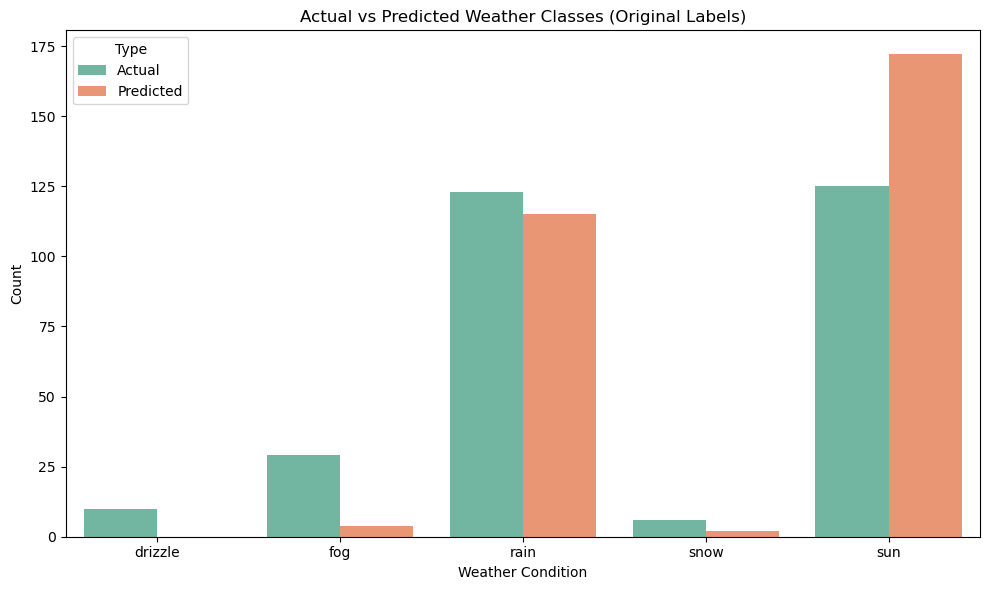

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
# Decode y_test and y_pred to original labels
y_test_labels = weather_le.inverse_transform(y_test)
y_pred_labels = weather_le.inverse_transform(y_pred)

# Create DataFrame
compare_df = pd.DataFrame({
    'Actual': y_test_labels,
    'Predicted': y_pred_labels
})

# Count values
actual_counts = compare_df['Actual'].value_counts().sort_index()
pred_counts = compare_df['Predicted'].value_counts().sort_index()

# Combine for bar plot
plot_df = pd.DataFrame({
    'Actual': actual_counts,
    'Predicted': pred_counts
}).reset_index().melt(id_vars='index', var_name='Type', value_name='Count')

plot_df.rename(columns={'index': 'Weather'}, inplace=True)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=plot_df, x='Weather', y='Count', hue='Type', palette='Set2')
plt.title('Actual vs Predicted Weather Classes (Original Labels)')
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [ ]:
#The bar plot comparing actual and predicted weather classes reveals the following:
* Balanced Predictions for Major Classes:
The model performs well on classes like rain and snow, with predicted counts closely matching actual values.
* Underprediction of Rare Classes:
Fogs are consistently underpredicted.
This suggests the model may struggle to detect fogs accurately, potentially due to overlapping patterns in temperature or precipitation with other classes.
* Overprediction of Certain Conditions:
There may be slight overprediction for sun